In [1]:
import math
import random
from ps3_verify_movement27 import test_robot_movement
random.seed(0)

In [2]:
class Position(object):
    """
    A Position represents a location in a two-dimensional room, where
    coordinates are given by floats (x, y).
    """
    def __init__(self, x, y):
        """
        Initializes a position with coordinates (x, y).
        """
        self.x = x
        self.y = y
        
    def get_x(self):
        return self.x
    
    def get_y(self):
        return self.y
    
    def get_new_position(self, angle, speed):
        """
        Computes and returns the new Position after a single clock-tick has
        passed, with this object as the current position, and with the
        specified angle and speed.

        Does NOT test whether the returned position fits inside the room.

        angle: float representing angle in degrees, 0 <= angle < 360
        speed: positive float representing speed

        Returns: a Position object representing the new position.
        """
        old_x, old_y = self.get_x(), self.get_y()
        
        # Compute the change in position
        delta_y = speed * math.cos(math.radians(angle))
        delta_x = speed * math.sin(math.radians(angle))
        
        # Add that to the existing position
        new_x = old_x + delta_x
        new_y = old_y + delta_y
        
        return Position(new_x, new_y)

    def __str__(self):  
        return "Position: " + str(math.floor(self.x)) + ", " + str(math.floor(self.y))

In [3]:
class RectangularRoom(object):
    """
    A RectangularRoom represents a rectangular region containing clean or dirty
    tiles.

    A room has a width and a height and contains (width * height) tiles. Each tile
    has some fixed amount of dirt. The tile is considered clean only when the amount
    of dirt on this tile is 0.
    """
    def __init__(self, width, height, dirt_amount):
        """
        Initializes a rectangular room with the specified width, height, and 
        dirt_amount on each tile.

        width: an integer > 0
        height: an integer > 0
        dirt_amount: an integer >= 0
        """
        # since it is not assumed width and height to be integers, we convert them.
        # It is also not assumed to be positive, so it prints an error
        
        
        width, height = int(width), int(height)
        if width <= 0:
            print('Error: width is non positive!')
        if height <= 0:
            print('Error: height is non positive!')
        if dirt_amount < 0:
            print('Error: dirty_amount is negative!')
        self.width = width
        self.height = height
        # RectangularRoom also has the attribute tiles with each tile initially having
        # dirt_amount 
        self.tiles = {}
        
        for i in range(width):
            for j in range(height):
                self.tiles[i,j] = dirt_amount
        
    
    def clean_tile_at_position(self, pos, capacity):
        """
        Mark the tile under the position pos as cleaned by capacity amount of dirt.

        Assumes that pos represents a valid position inside this room.

        pos: a Position object
        capacity: the amount of dirt to be cleaned in a single time-step
                  can be negative which would mean adding dirt to the tile

        Note: The amount of dirt on each tile should be NON-NEGATIVE.
              If the capacity exceeds the amount of dirt on the tile, mark it as 0.
        """
        x_coord = math.floor(pos.get_x())
        y_coord = math.floor(pos.get_y())
        self.tiles[x_coord,y_coord] -= capacity
        if self.tiles[x_coord,y_coord] < 0 :
            self.tiles[x_coord,y_coord] = 0        
        

    def is_tile_cleaned(self, m, n):
        """
        Return True if the tile (m, n) has been cleaned.

        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer
        
        Returns: True if the tile (m, n) is cleaned, False otherwise

        Note: The tile is considered clean only when the amount of dirt on this
              tile is 0.
        """
        if self.tiles[m,n] == 0:
            return True
        return False
        
        

    def get_num_cleaned_tiles(self):
        """
        Returns: an integer; the total number of clean tiles in the room
        """
        total = 0
        for m in range(self.width):
            for n in range(self.height):
                if self.is_tile_cleaned(m,n):
                    total += 1
        return total
        
    def is_position_in_room(self, pos):
        """
        Determines if pos is inside the room.

        pos: a Position object.
        Returns: True if pos is in the room, False otherwise.
        """
        if 0 <= pos.get_x() <= self.width and 0 <= pos.get_y() <= self.height :
            return True
        return False
        
    def get_dirt_amount(self, m, n):
        """
        Return the amount of dirt on the tile (m, n)
        
        Assumes that (m, n) represents a valid tile inside the room.

        m: an integer
        n: an integer

        Returns: an integer
        """
        return self.tiles[m,n]
        #raise NotImplementedError
        
    def get_num_tiles(self):
        """
        Returns: an integer; the total number of tiles in the room
        """
        # do not change -- implement in subclasses.
        raise NotImplementedError 
        
    def is_position_valid(self, pos):
        """
        pos: a Position object.
        
        returns: True if pos is in the room and (in the case of FurnishedRoom) 
                 if position is unfurnished, False otherwise.
        """
        # do not change -- implement in subclasses
        raise NotImplementedError         

    def get_random_position(self):
        """
        Returns: a Position object; a random position inside the room
        """
        # do not change -- implement in subclasses
        raise NotImplementedError        

In [4]:
class Robot(object):
    """
    Represents a robot cleaning a particular room.

    At all times, the robot has a particular position and direction in the room.
    The robot also has a fixed speed and a fixed cleaning capacity.

    Subclasses of Robot should provide movement strategies by implementing
    update_position_and_clean, which simulates a single time-step.
    """
    def __init__(self, room, speed, capacity):
        """
        Initializes a Robot with the given speed and given cleaning capacity in the 
        specified room. The robot initially has a random direction and a random 
        position in the room.

        room:  a RectangularRoom object.
        speed: a float (speed > 0)
        capacity: a positive interger; the amount of dirt cleaned by the robot 
                  in a single time-step
        """
        self.room = room
        self.speed = speed
        self.capacity = capacity
        self.position = room.get_random_position()
        self.direction = random.uniform(0,360)

    def get_robot_position(self):
        """
        Returns: a Position object giving the robot's position in the room.
        """
        return self.position

    def get_robot_direction(self):
        """
        Returns: a float d giving the direction of the robot as an angle in
        degrees, 0.0 <= d < 360.0.
        """
        return self.direction
        

    def set_robot_position(self, position):
        """
        Set the position of the robot to position.

        position: a Position object.
        """
        self.position = position

    def set_robot_direction(self, direction):
        """
        Set the direction of the robot to direction.

        direction: float representing an angle in degrees
        """
        self.direction = direction
        

    def update_position_and_clean(self):
        """
        Simulate the raise passage of a single time-step.

        Move the robot to a new random position (if the new position is invalid, 
        rotate once to a random new direction, and stay stationary) and mark the tile it is on as having
        been cleaned by capacity amount. 
        """
        # do not change -- implement in subclasses
        raise NotImplementedError

In [5]:
class EmptyRoom(RectangularRoom):
    """
    An EmptyRoom represents a RectangularRoom with no furniture.
    """
    
    def __init__(self, width, height, dirt_amount) :
        RectangularRoom.__init__(self, width, height, dirt_amount)
    
    def get_num_tiles(self):
        """
        Returns: an integer; the total number of tiles in the room
        """
        return self.width * self.height 
        
    def is_position_valid(self, pos):
        """
        pos: a Position object.
        
        Returns: True if pos is in the room, False otherwise.
        """
        return self.is_position_in_room(pos)
 
        
    def get_random_position(self):
        """
        Returns: a Position object; a valid random position (inside the room).
        """
        w = self.width
        h = self.height
        x_coord = random.uniform(0,w-1)
        y_coord = random.uniform(0,h-1)
        return Position(x_coord,y_coord)

In [6]:
class FurnishedRoom(RectangularRoom):
    """
    A FurnishedRoom represents a RectangularRoom with a rectangular piece of 
    furniture. The robot should not be able to land on these furniture tiles.
    """
    def __init__(self, width, height, dirt_amount):
        """ 
        Initializes a FurnishedRoom, a subclass of RectangularRoom. FurnishedRoom
        also has a list of tiles which are furnished (furniture_tiles).
        """
        # This __init__ method is implemented for you -- do not change.
        
        # Call the __init__ method for the parent class
        RectangularRoom.__init__(self, width, height, dirt_amount)
        # Adds the data structure to contain the list of furnished tiles
        self.furniture_tiles = []
        
    def add_furniture_to_room(self):
        """
        Add a rectangular piece of furniture to the room. Furnished tiles are stored 
        as (x, y) tuples in the list furniture_tiles 
        
        Furniture location and size is randomly selected. Width and height are selected
        so that the piece of furniture fits within the room and does not occupy the 
        entire room. Position is selected by randomly selecting the location of the 
        bottom left corner of the piece of furniture so that the entire piece of 
        furniture lies in the room.
        """
        # This addFurnitureToRoom method is implemented for you. Do not change it.
        furniture_width = random.randint(1, self.width - 1)
        furniture_height = random.randint(1, self.height - 1)

        # Randomly choose bottom left corner of the furniture item.    
        f_bottom_left_x = random.randint(0, self.width - furniture_width)
        f_bottom_left_y = random.randint(0, self.height - furniture_height)

        # Fill list with tuples of furniture tiles.
        for i in range(f_bottom_left_x, f_bottom_left_x + furniture_width):
            for j in range(f_bottom_left_y, f_bottom_left_y + furniture_height):
                self.furniture_tiles.append((i,j))             

    def is_tile_furnished(self, m, n):
        """
        Return True if tile (m, n) is furnished.
        """
        return (m,n) in self.furniture_tiles
            
        
    def is_position_furnished(self, pos):
        """
        pos: a Position object.

        Returns True if pos is furnished and False otherwise
        """
        m, n = math.floor(pos.get_x()), math.floor(pos.get_y())
        return self.is_tile_furnished(m,n)
        
    def is_position_valid(self, pos):
        """
        pos: a Position object.
        
        returns: True if pos is in the room and is unfurnished, False otherwise.
        """
        if (not (self.is_position_furnished(pos)) and self.is_position_in_room(pos)):
            return True
        else:
            return False
        
    def get_num_tiles(self):
        """
        Returns: an integer; the total number of tiles in the room that can be accessed.
        """
        return len(self.tiles.keys())-len(self.furniture_tiles)
        
    def get_random_position(self):
        """
        Returns: a Position object; a valid random position (inside the room and not in a furnished area).
        """
        pos = Position(self.width*random.random(),self.height*random.random())
        while not self.is_position_valid(pos):
            pos = Position(self.width*random.random(),self.height*random.random())
        
        return pos

In [7]:
class StandardRobot(Robot):
    """
    A StandardRobot is a Robot with the standard movement strategy.

    At each time-step, a StandardRobot attempts to move in its current
    direction; when it would hit a wall or furtniture, it *instead*
    chooses a new direction randomly.
    """
    def __init__(self,room, speed, capacity):
        Robot.__init__(self, room, speed, capacity)
    
    
    def update_position_and_clean(self):
        """
        Simulate the raise passage of a single time-step.

        Move the robot to a new random position (if the new position is invalid, 
        rotate once to a random new direction, and stay stationary) and clean the dirt on the tile
        by its given capacity. 
        """
        speed = self.speed
        angle = self.direction
        new_pos = self.position.get_new_position(angle, speed)
        if self.room.is_position_valid(new_pos): # if new_pos is valid clean
            self.set_robot_position(new_pos)
            self.room.clean_tile_at_position(self.position, self.capacity)
        else:
            self.set_robot_direction(360*random.random())

## Some Tests for the StandarRobot:

In [8]:
# Uncomment this line to see your implementation of StandardRobot in action!
#test_robot_movement(StandardRobot, EmptyRoom)
#test_robot_movement(StandardRobot, FurnishedRoom)

In [9]:
class FaultyRobot(Robot):
    """
    A FaultyRobot is a robot that will not clean the tile it moves to and
    pick a new, random direction for itself with probability p rather
    than simply cleaning the tile it moves to.
    """
    p = 0.15
    
    def __init__(self, room, speed, capacity):
        Robot.__init__(self, room, speed, capacity)


    @staticmethod
    def set_faulty_probability(prob):
        """
        Sets the probability of getting faulty equal to PROB.

        prob: a float (0 <= prob <= 1)
        """
        FaultyRobot.p = prob
    
    def gets_faulty(self):
        """
        Answers the question: Does this FaultyRobot get faulty at this timestep?
        A FaultyRobot gets faulty with probability p.

        returns: True if the FaultyRobot gets faulty, False otherwise.
        """
        return random.random() < FaultyRobot.p
    
    def update_position_and_clean(self):
        """
        Simulate the passage of a single time-step.

        Check if the robot gets faulty. If the robot gets faulty,
        do not clean the current tile and change its direction randomly.

        If the robot does not get faulty, the robot should behave like
        StandardRobot at this time-step (checking if it can move to a new position,
        move there if it can, pick a new direction and stay stationary if it can't)
        """
        if self.gets_faulty():
            self.set_robot_direction(360*random.random())
        else :
            new_pos = self.position.get_new_position(self.direction, self.speed)
            if self.room.is_position_valid(new_pos):
                self.set_robot_position(new_pos)
                self.room.clean_tile_at_position(self.position, self.capacity)
            else :
                self.set_robot_direction(360*random.random())
            


## Simulation of several robots cleaning EmptyRoom

In [10]:
# Lets first simulate one clean with num_robots Robots   of type robot_type              
def sim_clean(num_robots,speed,capacity,width,height,dirt_amount,min_coverage,robot_type):
    """
    This function simulates one cleaning of num_robots robots of type robot_type.
    Returns the number of time steps needed to get cleaned min_coverage fraction of
    total tiles

    Parameters
    ----------
    num_robots : integer>0. The number of robots
    speed : float >0. The speed of each robot
    capacity : int>=0. The clean capacity of each robot in one time step
    width : int>0. The width of the room to be cleaned
    height : int>0. The height of the room to be cleaned
    dirt_amount : int >0. The initial amount of dirt in each tile of the room
    min_coverage : float in [0,1]. Fraction of total tiles to get cleaned
    robot_type : Robot class. To be instantiated as StandardRobot of FaultyRobot

    Returns
    -------
    time : int >0. The number of time steps needed to clean the fraction 
    min_coverage of the room

    """                
    room = EmptyRoom(width,height,dirt_amount)
    robots = []
    for id_R in range(num_robots):
        robots.append(robot_type(room, speed, capacity))
        pos = room.get_random_position()        
        robots[id_R].set_robot_position(pos)
    time = 0
    while float(room.get_num_cleaned_tiles())/room.get_num_tiles() < min_coverage:
        for robot in robots:
            robot.update_position_and_clean()
        time +=1

    return time
                            
def run_simulation(num_robots, speed, capacity, width, height, dirt_amount,\
                   min_coverage, num_trials,robot_type):
    """
    Runs num_trials trials of the simulation and returns the mean number of
    time-steps needed to clean the fraction min_coverage of the room.

    The simulation is run with num_robots robots of type robot_type, each       
    with the input speed and capacity in a room of dimensions width x height
    with the dirt dirt_amount on each tile.
    
    num_robots: an int (num_robots > 0)
    speed: a float (speed > 0)
    capacity: an int (capacity >0)
    width: an int (width > 0)
    height: an int (height > 0)
    dirt_amount: an int
    min_coverage: a float (0 <= min_coverage <= 1.0)
    num_trials: an int (num_trials > 0)
    robot_type: class of robot to be instantiated (e.g. StandardRobot or
                FaultyRobot)
    """
    times = []
    for iter in range(num_trials):
        trial_time = sim_clean(num_robots, speed, capacity, width, height, dirt_amount,\
                          min_coverage,robot_type)
        times.append(trial_time)
    
    return sum(times)/num_trials


# Testing the simulation:

In [11]:
# print ('avg time steps: ' + str(run_simulation(1, 1.0, 1, 5, 5, 3, 1.0, 50, StandardRobot)))
# print ('avg time steps: ' + str(run_simulation(1, 1.0, 1, 10, 10, 3, 0.8, 50, StandardRobot)))
# print ('avg time steps: ' + str(run_simulation(1, 1.0, 1, 10, 10, 3, 0.9, 50, StandardRobot)))
# print ('avg time steps: ' + str(run_simulation(1, 1.0, 1, 20, 20, 3, 0.5, 50, StandardRobot)))
# print ('avg time steps: ' + str(run_simulation(3, 1.0, 1, 20, 20, 3, 0.5, 50, StandardRobot)))

ANSWER THE FOLLOWING QUESTIONS:

1)How does the performance of the two robot types compare when cleaning 80%
      of a 20x20 room?
      
To answer this, we compute the two means and compare them:
    

avr_std_robot = run_simulation(1, 1.0, 1, 20, 20, 3, 0.8, 50, StandardRobot)

avr_faulty_robot = run_simulation(1, 1.0, 1, 20, 20, 3, 0.8, 50, FaultyRobot)




2) How does the performance of the two robot types compare when two of each
      robot cleans 80% of rooms with dimensions 
      10x30, 20x15, 25x12, and 50x6?
      
To answer this, we compute:

run_simulation(2, 1.0, 1, 10, 30, 3, 0.8, 50, StandardRobot)

run_simulation(2, 1.0, 1, 10, 30, 3, 0.8, 50, FaultyRobot)

and so on 


# Plotting the results obtained in the simulation above:

In [14]:
import matplotlib.pyplot as plt
%matplotlib inline

def show_plot_compare_strategies(title, x_label, y_label):
    """
    Produces a plot comparing the two robot strategies in a 20x20 room with 80%
    minimum coverage.
    """
    num_robot_range = range(1, 11)
    times1 = []
    times2 = []
    for num_robots in num_robot_range:
        print ("Plotting", num_robots, "robots...")
        times1.append(run_simulation(num_robots, 1.0, 1, 5, 5, 3, 0.8, 20, StandardRobot))
        times2.append(run_simulation(num_robots, 1.0, 1, 5, 5, 3, 0.8, 20, FaultyRobot))
    #plt.figure()
    plt.plot(num_robot_range, times1)
    plt.plot(num_robot_range, times2)
    plt.title(title)
    plt.legend(('StandardRobot', 'FaultyRobot'))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()
    
def show_plot_room_shape(title, x_label, y_label):
    """
    Produces a plot showing dependence of cleaning time on room shape.
    """
    aspect_ratios = []
    times1 = []
    times2 = []
    for width in [10, 20, 25, 50]:
        height = 300/width
        print ("Plotting cleaning time for a room of width:", width, "by height:", height)
        aspect_ratios.append(float(width) / height)
        times1.append(run_simulation(2, 1.0, 1, width, height, 3, 0.8, 200, StandardRobot))
        times2.append(run_simulation(2, 1.0, 1, width, height, 3, 0.8, 200, FaultyRobot))
    plt.plot(aspect_ratios, times1)
    plt.plot(aspect_ratios, times2)
    plt.title(title)
    plt.legend(('StandardRobot', 'FaultyRobot'))
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()



Plotting 1 robots...
Plotting 2 robots...
Plotting 3 robots...
Plotting 4 robots...
Plotting 5 robots...
Plotting 6 robots...
Plotting 7 robots...
Plotting 8 robots...
Plotting 9 robots...
Plotting 10 robots...


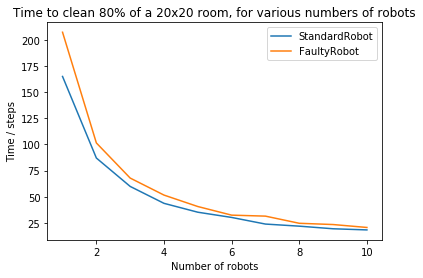

In [13]:
show_plot_compare_strategies('Time to clean 80% of a 20x20 room, for various numbers of robots','Number of robots','Time / steps')


Plotting cleaning time for a room of width: 10 by height: 30.0
Plotting cleaning time for a room of width: 20 by height: 15.0
Plotting cleaning time for a room of width: 25 by height: 12.0
Plotting cleaning time for a room of width: 50 by height: 6.0


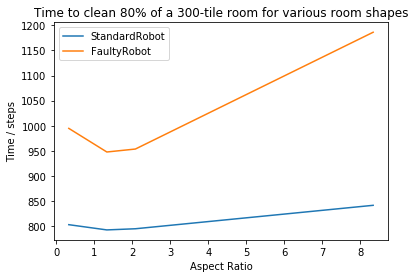

In [15]:
show_plot_room_shape('Time to clean 80% of a 300-tile room for various room shapes','Aspect Ratio', 'Time / steps')
